# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

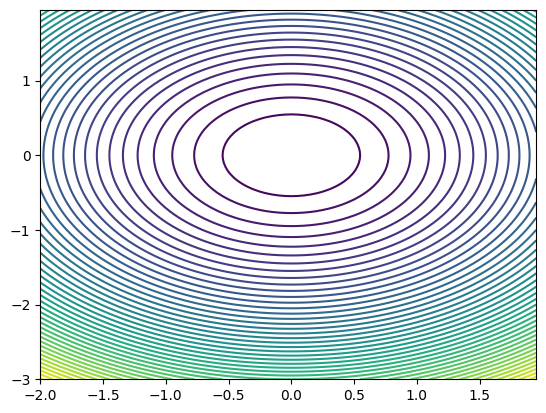

In [2]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

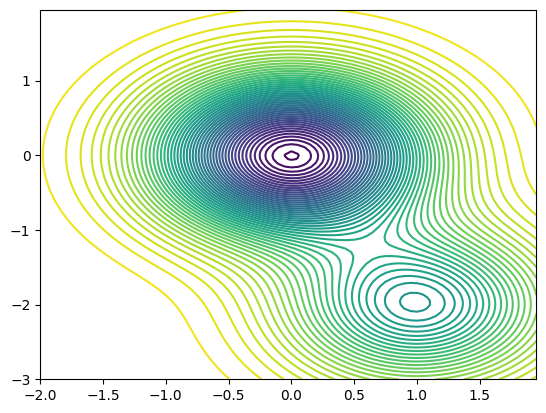

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [4]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10, c='red')

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        x1_gra, x2_gra = self.calculate_func_grad(x1, x2)
        return x1 - self.alpha * x1_gra, x2 - self.alpha * x2_gra

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:bool=0, plot:bool=False)->float:
        self.trace = []
        for step in range(steps):
          x1_init, x2_init = self.gradient_descent_step(x1_init, x2_init)
          self.trace.append([x1_init, x2_init])
        self.trace = np.array(self.trace)
        if plot:
          self.plot_func()
        if verbose:
          print(f'Minimize value {x1_init, x2_init} equal {self.calculate_func_vale(self.trace[-1][0], self.trace[-1][1])}')
          return self.trace
        return self.calculate_func_vale(self.trace[-1][0], self.trace[-1][1])


# Funkcja 1

Minimize value (-0.017293822569102706, 0.02305843009213694) equal 0.0008307674973655726
[[-1.2         1.6       ]
 [-0.96        1.28      ]
 [-0.768       1.024     ]
 [-0.6144      0.8192    ]
 [-0.49152     0.65536   ]
 [-0.393216    0.524288  ]
 [-0.3145728   0.4194304 ]
 [-0.25165824  0.33554432]
 [-0.20132659  0.26843546]
 [-0.16106127  0.21474836]
 [-0.12884902  0.17179869]
 [-0.10307922  0.13743895]
 [-0.08246337  0.10995116]
 [-0.0659707   0.08796093]
 [-0.05277656  0.07036874]
 [-0.04222125  0.056295  ]
 [-0.033777    0.045036  ]
 [-0.0270216   0.0360288 ]
 [-0.02161728  0.02882304]
 [-0.01729382  0.02305843]]


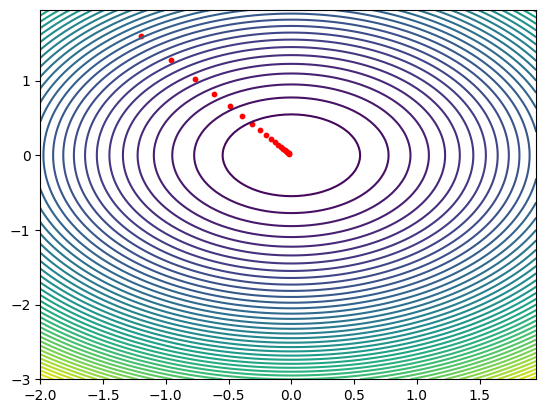

In [5]:
grad = SimpleGradientDescent(lambda x1, x2: x1**2 + x2**2, lambda x1, x2: (2*x1, 2*x2), 0.1)
print(grad.minimize(-1.5, 2, 20, plot=True, verbose=1))

# Funkcja 2

Minimize value (0.6258024576927818, -1.253062695566376) equal 1.1105892934049588
[[ 0.60271967 -1.24174791]
 [ 0.6050322  -1.24072223]
 [ 0.60700418 -1.23989452]
 [ 0.60869259 -1.23924213]
 [ 0.61014646 -1.23874766]
 [ 0.61140821 -1.23839848]
 [ 0.61251498 -1.23818643]
 [ 0.61349961 -1.23810767]
 [ 0.61439171 -1.23816262]
 [ 0.61521848 -1.2383561 ]
 [ 0.61600559 -1.23869752]
 [ 0.61677793 -1.23920132]
 [ 0.61756042 -1.23988745]
 [ 0.6183788  -1.24078214]
 [ 0.61926041 -1.24191881]
 [ 0.62023508 -1.24333914]
 [ 0.62133607 -1.24509444]
 [ 0.62260104 -1.24724723]
 [ 0.6240732  -1.24987308]
 [ 0.62580246 -1.2530627 ]]


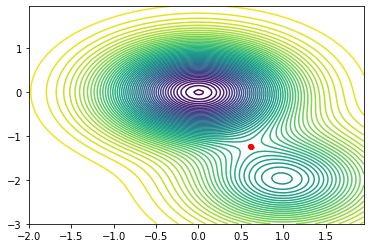

In [ ]:
grad2 = SimpleGradientDescent(lambda x1, x2: 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2)), lambda x1, x2: (2*x1 * np.exp(-x1**(2)-x2**(2)) + (x1 - 1)*np.exp(-(x1-1)**(2)-(x2+2)**(2)), 2*x2 * np.exp(-x1**(2)-x2**(2)) + (x2 + 2)*np.exp(-(x1-1)**(2)-(x2+2)**(2))), 0.2)
print(grad2.minimize(0.6, -1.243, 20, plot=True, verbose=1))